<h1> Portfolio Optimization </h1>

In this project, I will build two portfolios each containing four stocks. Each portfolio will have $10,000. The first portfolio will have <em>equal weighting</em> while the other portfolio will be optimized with a weighting that returns the maximum returns after adjusting the risks.

## 1. Gathering the data

In [2]:
#Import the required packages

import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Create Parameters for start and end dates

start_date = '2018-01-01'
end_date = '2022-09-30'

#Create a list of the ticker symbols for our portfolio

stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL']

#Now we create an empty dictionary to store the stock portfolio data
stocks = {}

#Get the adj close data for all the stock list using the for loop
for i in stock_list:
    stocks[i] = pdr.DataReader(i, 'yahoo', start_date, end_date)[['Adj Close']]

In [4]:
stocks['AAPL'].head(10)

,Adj Close
Date,
2018-01-02,41.018433
2018-01-03,41.011284
2018-01-04,41.201778
2018-01-05,41.670876
2018-01-08,41.516102
2018-01-09,41.511330
2018-01-10,41.501808
2018-01-11,41.737545
2018-01-12,42.168545


## 2. Equal-Weighted portfolio

We first have to build three other columns.
- Normalized return = Adjusted Close/ Adjusted Close on the `start_date` of the portfolio
- Allocation = Normalixed return * 0.25 (equal weighting for each of the four stocks)
- Position value = Allocation * 10,000 (Value of the portfolio)



In [5]:
#Creating the 'Normalized return' for each of the 

for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] #This line sekects the first row from the Adjusted Close column
    stock_data['Normalized Return'] = stock_data['Adj Close']/first_adj_close #Here now we divide each row by the value of the first adj close

In [6]:
stocks['AMD'].head(5)

,Adj Close,Normalized Return
Date,,
2018-01-02,10.98,1.000000
2018-01-03,11.55,1.051913
2018-01-04,12.12,1.103825
2018-01-05,11.88,1.081967
2018-01-08,12.28,1.118397


In [7]:
#Create equal weighted allocation for each stock

for stock_name, stock_data in stocks.items():
    stock_data['Allocation'] = stock_data['Normalized Return']*0.25

In [8]:
stocks['MSFT'].head(5)

,Adj Close,Normalized Return,Allocation
Date,,,
2018-01-02,81.168503,1.000000,0.250000
2018-01-03,81.546234,1.004654,0.251163
2018-01-04,82.263962,1.013496,0.253374
2018-01-05,83.283890,1.026062,0.256515
2018-01-08,83.368881,1.027109,0.256777


In [9]:
#Let us set the value of the stocks to 10,000

for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation']*10000

In [10]:
stocks['ORCL'].head(5)

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2018-01-02,42.924789,1.000000,0.250000,2500.000000
2018-01-03,43.918968,1.023161,0.255790,2557.902367
2018-01-04,44.351620,1.033240,0.258310,2583.100599
2018-01-05,44.618584,1.039460,0.259865,2598.648955
2018-01-08,45.088058,1.050397,0.262599,2625.991826


## Visualize portfolio Performance

To Visualize the performance of this portfolio, we will create two line charts to show the return of the portfolio and the return of the individual stocks over time. First we build a new dataframe that contains only the `position value` of each stockas well as the total value of the portfolio

In [11]:
#Let us create Position Value Dictionary

position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [12]:
position_values = pd.DataFrame(data = position_values)
position_values.head(5)

,AMD,AAPL,MSFT,ORCL
Date,,,,
2018-01-02,2500.000000,2500.000000,2500.000000,2500.000000
2018-01-03,2629.781574,2499.564297,2511.634172,2557.902367
2018-01-04,2759.562931,2511.174598,2533.740273,2583.100599
2018-01-05,2704.918172,2539.765228,2565.154182,2598.648955
2018-01-08,2795.992770,2530.332048,2567.771929,2625.991826


In [13]:
#Lets add the "Total" by summing the position values

position_values['Total'] = position_values.sum(axis=1)

In [14]:
position_values.head(5)

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2018-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2018-01-03,2629.781574,2499.564297,2511.634172,2557.902367,10198.882410
2018-01-04,2759.562931,2511.174598,2533.740273,2583.100599,10387.578401
2018-01-05,2704.918172,2539.765228,2565.154182,2598.648955,10408.486537
2018-01-08,2795.992770,2530.332048,2567.771929,2625.991826,10520.088573


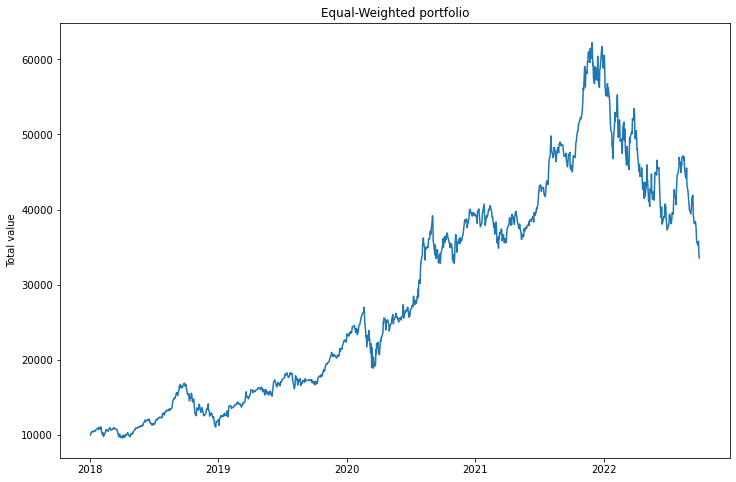

In [15]:
#Let us plot 

plt.figure(figsize = (12,8))
plt.plot(position_values.Total)

plt.title('Equal-Weighted portfolio')
plt.ylabel('Total value');


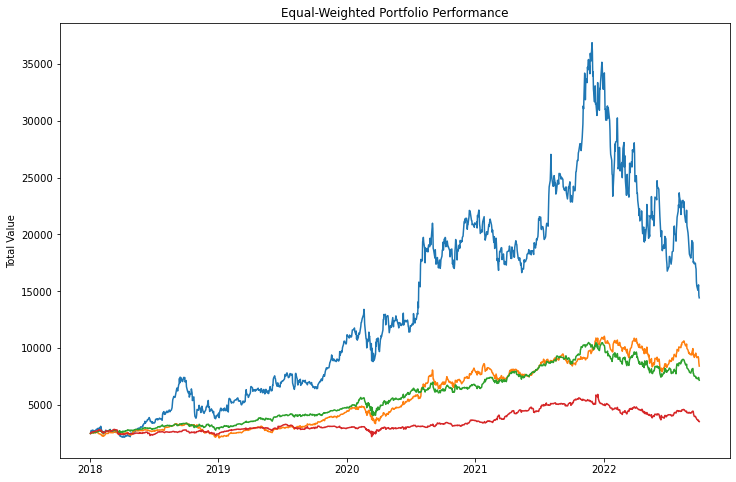

In [16]:
plt.figure(figsize=(12,8))
plt.plot(position_values.iloc[:,0:4])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value');

## Let's Calculate The performance metrics for our portfolio

The performance metrics include
- Cumulative return
- Mean daily return
- Standard deviation Daily return
- Sharpe ratio
- Annualized Sharpe Ratio

In [17]:
#We begin by defining the start and end value of out portfolio

end_value = position_values['Total'][-1]
start_value = position_values['Total'][0]

#Now we have to calculate the cumulative portfolio return as Percentage
cumulative_return = end_value / start_value -1

print(str(round(cumulative_return*100,2)), '%')


235.61 %


In [18]:
#Let us create a daily returns Column

position_values['Daily return'] = position_values['Total'].pct_change()
position_values.head(5)

,AMD,AAPL,MSFT,ORCL,Total,Daily return
Date,,,,,,
2018-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2018-01-03,2629.781574,2499.564297,2511.634172,2557.902367,10198.882410,0.019888
2018-01-04,2759.562931,2511.174598,2533.740273,2583.100599,10387.578401,0.018502
2018-01-05,2704.918172,2539.765228,2565.154182,2598.648955,10408.486537,0.002013
2018-01-08,2795.992770,2530.332048,2567.771929,2625.991826,10520.088573,0.010722


In [19]:
#Leyt us calculate the mean Daily return

mean_daily_return = position_values['Daily return'].mean()

print('The dily return is: ', str(round(mean_daily_return, 4)))

The dily return is:  0.0013


In [20]:
#Let us get the standard deviation of the daily return

std_daily_return = position_values['Daily return'].std()

print('The std daily return is: ', str(round(std_daily_return,4)))

The std daily return is:  0.0228


In [21]:
#Let us calculate the Sharpe ratio

sharpe_ratio = mean_daily_return / std_daily_return
sharpe_ratio

0.05579237152241132

In [22]:
#Let us calculate the Annualized sharpe ratio

annualized_sharpe_ratio = sharpe_ratio * 252**0.5
annualized_sharpe_ratio

0.885676440616935

# Weighted Portfolio

First, We will have to create two dictionaries:
- To contain adjusted close for each day
- To change the adjusted close into percentage change.

In [25]:
stock_adj_close = {}

for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']
    

In [27]:
stock_adj_close = pd.DataFrame(data=stock_adj_close)

stock_adj_close.head(5)

,AMD,AAPL,MSFT,ORCL
Date,,,,
2018-01-02,10.98,41.018433,81.168503,42.924789
2018-01-03,11.55,41.011284,81.546234,43.918968
2018-01-04,12.12,41.201778,82.263962,44.351620
2018-01-05,11.88,41.670876,83.283890,44.618584
2018-01-08,12.28,41.516102,83.368881,45.088058


In [29]:
#We create a stockreturn dataframe to see the day over day change in value

stocks_returns = stock_adj_close.pct_change()

stocks_returns.head(5)

,AMD,AAPL,MSFT,ORCL
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.051913,-0.000174,0.004654,0.023161
2018-01-04,0.049351,0.004645,0.008801,0.009851
2018-01-05,-0.019802,0.011385,0.012398,0.006019
2018-01-08,0.033670,-0.003714,0.001021,0.010522


## Let us Build and Run the 10,000 scenarios.

First we have to create a structure to hold the results. I will crete four arrays.

- Weights Array
- Returns Array
- volatility Array
- Sharpe Array

In [30]:
#Define the number of scenarios and create an array to populate the weightings of each scenario

scenarios = 10000

weights_array = np.zeros((scenarios, len(stocks_returns.columns)))

weights_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [31]:
#Let us create empty arrays for the other three.

returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [33]:
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios):
    #We want to generate 4 random numbers for each index
    numbers = np.array(np.random.random(4))
    
    #Generate random weight by dividing each number by the sum of the four numbers
    weights = numbers / np.sum(numbers)
    
    #Let us save the weights in weights_array
    weights_array[index, :] = weights
    
    #Let us get the return for each scenario
    returns_array[index] = np.sum(stocks_returns.mean()*252*weights)
    
    #Let us calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T, np.dot(stocks_returns.cov()*252, weights)))
    
    #Let us get the sharpe ratio for each scenario
    sharpe_array[index] = returns_array[index]/volatility_array[index]

In [34]:
print("The first combination:", weights_array[0])

The first combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [35]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 1.002993602134496
